In [286]:
from config import CLIENT_ID, CLIENT_SECRET

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import seaborn as sns

import json # library to handle JSON files
import urllib, json

import plotly.figure_factory as ff

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#!conda install -c plotly plotly-geo
import geopandas as gpd
import geocoder
import csv
#!conda install chart-studio

import matplotlib.pyplot as plt

import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

import fiona

### NY State Demographic data 


In [218]:
ny_demographic_data = pd.read_html('https://www.health.ny.gov/statistics/vital_statistics/2009/table02.htm')
ny_demographic_data = pd.DataFrame(ny_demographic_data[0])
ny_demographic_data.drop(ny_demographic_data.index[0:4], inplace=True)
ny_demographic_data.drop(ny_demographic_data.index[5:7], inplace=True)
ny_demographic_data.reset_index(inplace=True, drop=True)
ny_demographic_data.drop('2000 Census Population', axis=1, inplace=True)
ny_demographic_data.rename(columns={"2009 Population Estimate": "Population", 
                                    "2000 Land Area Square Miles": "Area", 
                                    "2009 Population Density1": "Density"},
                                    inplace=True)
ny_demographic_data['Population'] = [int(x) for x in ny_demographic_data['Population'].to_list()]
demog = ny_demographic_data.sort_values('Population', ascending=False).head(10).reset_index(drop=True)
demog

                    

County  Population     Area   Density
0        Kings     2567098    70.61  36358.05
1       Queens     2306712   109.24  21116.93
2     New York     1629054    22.96  70940.25
3      Suffolk     1518475   912.20   1664.63
4        Bronx     1397287    42.03  33247.32
5       Nassau     1357429   286.69   4734.80
6  Westchester      955962   432.82   2208.66
7         Erie      909247  1044.21    870.75
8       Monroe      733703   659.29   1112.86
9     Richmond      491730    58.48   8408.71

### NY State: Age adjusted percentage of adults obese (BMI 30 or higher)

In [23]:
ny_bmi_data = pd.read_csv(r'Community_Health___Age-adjusted_percentage_of_adults_obese__BMI_30_or_higher___2008_-_2009.csv')
ny_bmi_data = pd.DataFrame(ny_bmi_data)
ny_bmi_data.drop(['Indicator Number','Indicator','Quartile','Total Event Counts', 'Denominator', 'Denominator Note', 
                'Measure Unit', '95% CI', 'Data Comments', 'Data Years','Data Sources', 'Mapping Distribution'], axis=1, inplace=True)

ny_bmi_data.rename(columns={"County Name": "County", 
                                    "Region Name": "Region", 
                                    "Percentage/Rate": "BMI Rate"},
                                    inplace=True)

ny_bmi_data.drop(ny_bmi_data.index[-1], inplace=True)
ny_bmi_data.head(10)

County  County Code            Region  BMI Rate  \
0     Allegany            2  Western New York      30.5   
1  Cattaraugus            4  Western New York      31.7   
2   Chautauqua            6  Western New York      27.4   
3         Erie           14  Western New York      28.0   
4      Genesee           18  Western New York      27.6   
5      Niagara           29  Western New York      26.6   
6      Orleans           34  Western New York      29.1   
7      Wyoming           56  Western New York      31.6   
8      Chemung            7      Finger Lakes      30.0   
9   Livingston           24      Finger Lakes      22.7   

                  Location  
0  (42.226801, -78.020567)  
1  (42.224267, -78.606673)  
2  (42.246904, -79.315313)  
3  (42.888143, -78.795544)  
4  (43.000121, -78.172679)  
5  (43.134634, -78.856419)  
6  (43.248394, -78.218438)  
7  (42.723641, -78.204473)  
8  (42.116644, -76.812331)  
9  (42.763754, -77.765392)

### NY State: Age adjusted Percentage of adults eating 5 or more fruits or vegetables per day

In [238]:
ny_fruits_data = pd.read_csv('Community_Health__Age-adjusted_Percentage_of_adults_eating_5_or_more_fruits_or_vegetables_per_day__2008_-_2009.csv')
ny_fruits_data = pd.DataFrame(ny_fruits_data)
ny_fruits_data.drop(['Indicator Number','Indicator','Quartile','Total Event Counts', 'Denominator', 'Denominator Note', 
               'Measure Unit', '95% CI', 'Data Comments', 'Data Years','Data Sources', 'Mapping Distribution'], axis=1, inplace=True)

ny_fruits_data.rename(columns={"County Name": "County", 
                                    "Region Name": "Region", 
                                    "Percentage/Rate": "Fruits & Vegetable Eating Rate"},
                                    inplace=True)
#ny_fruits_data['Indicator'][0]

ny_fruits_data.drop(ny_fruits_data.index[0], inplace=True)
ny_fruits_data.sort_values('Fruits & Vegetable Eating Rate', ascending=False)

County  County Code                 Region  \
25      Onondaga           31       Central New York   
17         Yates           57           Finger Lakes   
28      Tompkins           50       Central New York   
12       Ontario           32           Finger Lakes   
27  St. Lawrence           40       Central New York   
36         Essex           15  Northeastern New York   
55   Westchester           55          Hudson Valley   
51        Putnam           37          Hudson Valley   
45   Schenectady           42  Northeastern New York   
50        Orange           33          Hudson Valley   
11        Monroe           26           Finger Lakes   
54        Ulster           51          Hudson Valley   
19      Cortland           11       Central New York   
61        Nassau           28         Nassau-Suffolk   
14        Seneca           45           Finger Lakes   
44      Saratoga           41  Northeastern New York   
42        Otsego           36  Northeastern New York   
9        Chemung            7           Finger Lakes   
53      Sullivan           48          Hudson Valley   
49      Dutchess           13          Hudson Valley   
29        Broome            3          New York-Penn   
43    Rensselaer           38  Northeastern New York   
33       Clinton            9  Northeastern New York   
6        Niagara           29       Western New York   
5        Genesee           18       Western New York   
26        Oswego           35       Central New York   
18        Cayuga            5       Central New York   
34      Columbia           10  Northeastern New York   
52      Rockland           39          Hudson Valley   
4           Erie           14       Western New York   
62       Suffolk           47         Nassau-Suffolk   
24        Oneida           30       Central New York   
16         Wayne           54           Finger Lakes   
46     Schoharie           43  Northeastern New York   
47        Warren           52  Northeastern New York   
10    Livingston           24           Finger Lakes   
48    Washington           53  Northeastern New York   
7        Orleans           34       Western New York   
3     Chautauqua            6       Western New York   
21     Jefferson           22       Central New York   
15       Steuben           46           Finger Lakes   
13      Schuyler           44           Finger Lakes   
30      Chenango            8          New York-Penn   
35      Delaware           12  Northeastern New York   
38        Fulton           17  Northeastern New York   
40      Hamilton           20  Northeastern New York   
41    Montgomery           27  Northeastern New York   
32        Albany            1  Northeastern New York   
39        Greene           19  Northeastern New York   
23       Madison           25       Central New York   
31         Tioga           49          New York-Penn   
1       Allegany            2       Western New York   
37      Franklin           16  Northeastern New York   
20      Herkimer           21       Central New York   
22         Lewis           23       Central New York   
2    Cattaraugus            4       Western New York   
8        Wyoming           56       Western New York   
58      New York           60          New York City   
57         Kings           59          New York City   
60      Richmond           62          New York City   
59        Queens           61          New York City   
56         Bronx           58          New York City   

    Fruits & Vegetable Eating Rate                 Location  
25                            33.7  (43.065629, -76.168033)  
17                            33.2  (42.634338, -77.078311)  
28                            33.1  (42.461024, -76.478784)  
12                            32.9  (42.894571, -77.252045)  
27                            30.9  (44.689468, -75.242045)  
36                            30.6  (44.166026, -73.685145)  
55                            30.6  (41.039278,

### NY State: Age adjusted Percentage of adults who did not participate in leisure time physical activity in last 30 days

In [26]:
ny_physactivity_data = pd.read_csv('Community_Health__Age-adjusted_Percentage_of_adults_who_did_not_participate_in_leisure_time_physical_activity_in_last_30_days__2008_-_2009.csv')
ny_physactivity_data = pd.DataFrame(ny_physactivity_data)
ny_physactivity_data.drop(['Indicator Number','Indicator','Quartile','Total Event Counts', 'Denominator', 'Denominator Note', 
               'Measure Unit', '95% CI', 'Data Comments', 'Data Years','Data Sources', 'Mapping Distribution'], axis=1, inplace=True)


ny_physactivity_data.rename(columns={"County Name": "County", 
                                    "Region Name": "Region", 
                                    "Percentage/Rate": "Physical Activity Rate"},
                                    inplace=True)
ny_physactivity_data.drop(ny_physactivity_data.index[-1], inplace=True)

ny_physactivity_data.head()


County  County Code            Region  Physical Activity Rate  \
0     Allegany            2  Western New York                    75.0   
1  Cattaraugus            4  Western New York                    78.4   
2   Chautauqua            6  Western New York                    77.9   
3         Erie           14  Western New York                    80.8   
4      Genesee           18  Western New York                    74.0   

                  Location  
0  (42.226801, -78.020567)  
1  (42.224267, -78.606673)  
2  (42.246904, -79.315313)  
3  (42.888143, -78.795544)  
4  (43.000121, -78.172679)

### Merging NY State data into one table

In [27]:
ny_data_joined = pd.merge(ny_demographic_data, ny_bmi_data, on="County", how='inner')
ny_data_joined = pd.merge(ny_data_joined, ny_fruits_data, on="County", how='inner')
ny_data_joined = pd.merge(ny_data_joined, ny_physactivity_data, on="County", how='inner')
ny_data_joined.drop(['Region_x', 'Location_x','County Code_x', 'Region_y', 'Location_y', 'County Code_y'], axis=1, inplace=True)

ny_data_joined.head()

County Population    Area   Density  BMI Rate  \
0     Bronx    1397287   42.03  33247.32      29.1   
1     Kings    2567098   70.61  36358.05      25.0   
2  New York    1629054   22.96  70940.25      16.1   
3    Queens    2306712  109.24  21116.93      20.6   
4  Richmond     491730   58.48   8408.71      26.6   

   Fruits & Vegetable Eating Rate  County Code         Region  \
0                             6.3           58  New York City   
1                            10.4           59  New York City   
2                            13.6           60  New York City   
3                             6.8           61  New York City   
4                            10.0           62  New York City   

   Physical Activity Rate                 Location  
0                    69.2   (40.85589, -73.868294)  
1                    70.4   (40.65642, -73.950691)  
2                    80.2  (40.726966, -74.005966)  
3                    71.9  (40.749338, -73.789673)  
4                    70.2  (40.566763, -74.148102)

In [28]:
column_names = ny_data_joined.columns.to_list()
column_names = ['County', 'County Code','Region','Area','Density','Population','BMI Rate',
 'Fruits & Vegetable Eating Rate','Physical Activity Rate','Location']
ny_data_joined=ny_data_joined[column_names]
ny_data_joined.head()

County  County Code         Region    Area   Density Population  \
0     Bronx           58  New York City   42.03  33247.32    1397287   
1     Kings           59  New York City   70.61  36358.05    2567098   
2  New York           60  New York City   22.96  70940.25    1629054   
3    Queens           61  New York City  109.24  21116.93    2306712   
4  Richmond           62  New York City   58.48   8408.71     491730   

   BMI Rate  Fruits & Vegetable Eating Rate  Physical Activity Rate  \
0      29.1                             6.3                    69.2   
1      25.0                            10.4                    70.4   
2      16.1                            13.6                    80.2   
3      20.6                             6.8                    71.9   
4      26.6                            10.0                    70.2   

                  Location  
0   (40.85589, -73.868294)  
1   (40.65642, -73.950691)  
2  (40.726966, -74.005966)  
3  (40.749338, -73.789673)  
4  (40.566763, -74.148102)

In [29]:
location_str = ''

for a in ny_data_joined['Location']:
     for b in a:
        if b not in ['(']:
             location_str += b
location_str = location_str.replace(')', ' ')
location_str = location_str.replace(',', '')

location = location_str.split(' ')
latitude = [location[a] for a in range(0,len(location), 2)]
latitude =latitude[:-1]
longitude = [location[a] for a in range(1,len(location), 2)]


ny_data_joined['Latitude'] = latitude
ny_data_joined['Longitude'] = longitude
ny_data_joined.drop('Location', axis=1, inplace=True)

In [30]:
ny_data_joined.head()

County  County Code         Region    Area   Density Population  \
0     Bronx           58  New York City   42.03  33247.32    1397287   
1     Kings           59  New York City   70.61  36358.05    2567098   
2  New York           60  New York City   22.96  70940.25    1629054   
3    Queens           61  New York City  109.24  21116.93    2306712   
4  Richmond           62  New York City   58.48   8408.71     491730   

   BMI Rate  Fruits & Vegetable Eating Rate  Physical Activity Rate  \
0      29.1                             6.3                    69.2   
1      25.0                            10.4                    70.4   
2      16.1                            13.6                    80.2   
3      20.6                             6.8                    71.9   
4      26.6                            10.0                    70.2   

    Latitude   Longitude  
0   40.85589  -73.868294  
1   40.65642  -73.950691  
2  40.726966  -74.005966  
3  40.749338  -73.789673  
4  40.566763  -74.148102

In [31]:
county_location_data = ny_data_joined[['County', 'Region', 'Latitude', 'Longitude']]
county_location_data.head()

County         Region   Latitude   Longitude
0     Bronx  New York City   40.85589  -73.868294
1     Kings  New York City   40.65642  -73.950691
2  New York  New York City  40.726966  -74.005966
3    Queens  New York City  40.749338  -73.789673
4  Richmond  New York City  40.566763  -74.148102

In [32]:
fips = pd.read_html('https://library.columbia.edu/services/research-data-services/guides/population/nycounty_fips.html')
fips = pd.DataFrame(fips[0])
fips = fips.rename(columns=fips.iloc[0]).drop(fips.index[0])
fips = fips.rename(columns={'County Name':'County'})
fips = fips.reset_index(drop=True)
column_n = fips['County'].to_list()
x = [a.replace(' County', '') for a in column_n]
fips['County'] = x
fips.drop(fips.index[fips['County'] == 'St. Lawrence'], inplace = True)
fips.shape

(61, 2)

In [33]:
ny_data_joined=pd.merge(ny_data_joined, fips, on='County', how='inner')
#ny_data_joined[ny_data_joined['Region'] == 'Central New York']

County  County Code            Region     Area Density Population  \
9      Cayuga            5  Central New York   693.18  114.73      79526   
15   Cortland           11  Central New York   499.65   96.06      47996   
25   Herkimer           21  Central New York  1411.25   44.10      62236   
26  Jefferson           22  Central New York  1272.20   93.32     118719   
27      Lewis           23  Central New York  1275.42   20.51      26157   
29    Madison           25  Central New York   655.86  106.66      69954   
34     Oneida           30  Central New York  1212.70  190.52     231044   
35   Onondaga           31  Central New York   780.29  582.80     454753   
39     Oswego           35  Central New York   953.30  127.32     121377   
53   Tompkins           50  Central New York   476.05  213.80     101779   

    BMI Rate  Fruits & Vegetable Eating Rate  Physical Activity Rate  \
9       27.6                            27.0                    77.1   
15      29.7                            29.3                    75.1   
25      29.5                            20.9                    79.6   
26      31.9                            24.8                    74.5   
27      27.8                            20.2                    75.9   
29      26.2                            22.6                    77.1   
34      25.7                            26.0                    75.4   
35      21.1                            33.7                    79.7   
39      32.0                            27.1                    77.0   
53      20.0                            33.1                    85.3   

     Latitude   Longitude County FIPS  
9   42.940095  -76.560755         011  
15  42.597101  -76.143291         023  
25  43.070026  -74.994246         043  
26  44.019295  -75.898971         045  
27  43.785537  -75.446296         049  
29  42.986917  -75.720031         053  
34  43.149482  -75.361773         065  
35  43.065629  -76.168033         067  
39   43.39123   -76.31133         075  
53  42.461024  -76.478784         109

In [303]:
column_names = ['County', 'County Code','County FIPS', 'Region','Area','Density','Population','BMI Rate',
 'Fruits & Vegetable Eating Rate','Physical Activity Rate','Latitude', 'Longitude']
ny_data_joined=ny_data_joined[column_names]

### Creating choropleth map for Physical Activity Data

In [35]:
ny_data_joined.astype({'County FIPS': 'object'}).dtypes

County                             object
County Code                         int64
County FIPS                        object
Region                             object
Area                               object
Density                            object
Population                         object
BMI Rate                          float64
Fruits & Vegetable Eating Rate    float64
Physical Activity Rate            float64
Latitude                           object
Longitude                          object
dtype: object

In [36]:
ny_data_joined['County FIPS'] = '36' +  ny_data_joined['County FIPS']

In [302]:
ny_data_joined.astype({'County FIPS': 'int64'}).dtypes

County                             object
County Code                         int64
County FIPS                         int64
Region                             object
Area                               object
Density                            object
Population                         object
BMI Rate                          float64
Fruits & Vegetable Eating Rate    float64
Physical Activity Rate            float64
Latitude                           object
Longitude                          object
dtype: object

In [301]:
ny_data_joined['County FIPS'] = [int(x) for x in ny_data_joined['County FIPS'].to_list()]

In [309]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
endpts = list(np.linspace(ny_data_joined['Physical Activity Rate'].min(), 
                                                  ny_data_joined['Physical Activity Rate'].max(), len(colorscale) - 1))
fips_ = ny_data_joined['County FIPS'].tolist()
values = ny_data_joined['Physical Activity Rate'].tolist()


fig = ff.create_choropleth(
    fips=fips_, values=values, scope=['NY'],
    binning_endpoints=endpts, colorscale=colorscale,
    show_state_data=True,
    show_hover=True,
    asp = 2.9,
    title_text = 'Age adjusted Percentage of adults who did not participate in leisure time physical activity in last 30 days',
    legend_title = '%'
)

fig.layout.template = None
fig.show()


C:\Users\Jasurbek\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




### Displaying BMI data in bar charts

In [46]:
bmi = ny_data_joined[['County','BMI Rate']]

top5 = bmi.sort_values('BMI Rate').head(10).reset_index(drop=True)
top5.rename(columns={'BMI Rate': 'BMI Rates'}, inplace=True)

bottom5 = bmi.sort_values('BMI Rate', ascending=False).head(10).reset_index(drop=True)
bottom5.rename(columns={'BMI Rate':'BMI Rates'}, inplace=True)

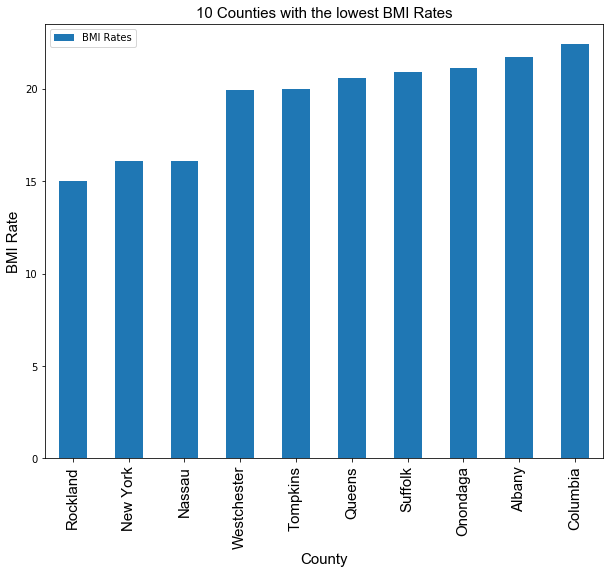

In [47]:
top5.plot(kind='bar', figsize=(10, 8), x='County', y='BMI Rates')

plt.xlabel('County', fontsize=15, fontname='arial')
plt.ylabel('BMI Rate', fontsize=15, fontname='arial')
plt.title('10 Counties with the lowest BMI Rates', fontsize=15, fontname='arial')
plt.xticks(fontsize=15, fontname='arial')

plt.show()


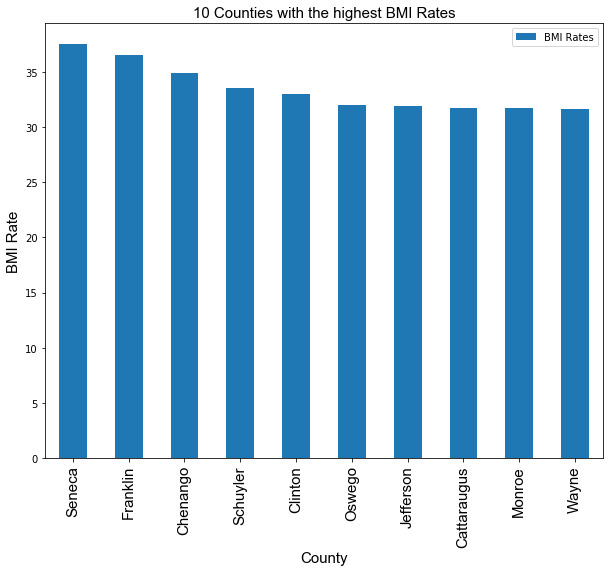

In [299]:
bottom5.plot(kind='bar', figsize=(10, 8), x='County', y='BMI Rates')

plt.xlabel('County', fontsize=15, fontname='arial') # add to x-label to the plot
plt.ylabel('BMI Rate', fontsize=15, fontname='arial') # add y-label to the plot
plt.title('10 Counties with the highest BMI Rates', fontsize=15, fontname='arial') # add title to the plot
plt.xticks(fontsize=15, fontname='arial')

plt.show()

### Merging health data into a single dataframe

In [298]:
main_data  = ny_data_joined[['County', 'BMI Rate', 'Fruits & Vegetable Eating Rate', 'Physical Activity Rate']]
main_data.rename(columns={'BMI Rate':'BMI Rate < 30'}, inplace=True)
main_data['BMI Rate < 30'] = 100 - main_data['BMI Rate < 30']
#main_data['Physical Activity Rate'].min()
main_data['Physical Activity Rate'] = 100- main_data['Physical Activity Rate']
main_data.sort_values('Physical Activity Rate').head()

County  BMI Rate < 30  Fruits & Vegetable Eating Rate  \
24  Hamilton           75.9                            24.1   
53  Tompkins           80.0                            33.1   
44  Saratoga           71.1                            28.1   
30    Monroe           68.3                            30.1   
17  Dutchess           72.4                            27.8   

    Physical Activity Rate  
24                    13.2  
53                    14.7  
44                    15.4  
30                    15.9  
17                    16.3

### Normalizing data using MinMaxScaler

In [222]:
for_minmax = main_data.iloc[:,1:] # Removed County
for_minmax.head(2)

BMI Rate < 30  Fruits & Vegetable Eating Rate  Physical Activity Rate
0           70.9                             6.3                    30.8
1           75.0                            10.4                    29.6

In [293]:
import pandas as pd
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(for_minmax)
df_normalized = pd.DataFrame(np_scaled)
df_normalized['County'] = main_data['County']
df_normalized=df_normalized[['County', 0,1,2]]
df_normalized.rename(columns={0:'BMI Rate < 30p',1:'Fruits & Vegetable Eating Rate',2:'Physical Activity Rate'}, inplace=True)
df_normalized.head()

County  BMI Rate < 30p  Fruits & Vegetable Eating Rate  \
0     Bronx        0.373333                        0.000000   
1     Kings        0.555556                        0.149635   
2  New York        0.951111                        0.266423   
3    Queens        0.751111                        0.018248   
4  Richmond        0.484444                        0.135036   

   Physical Activity Rate  
0                1.000000  
1                0.931818  
2                0.375000  
3                0.846591  
4                0.943182

### Displaying the health data in the heatmap

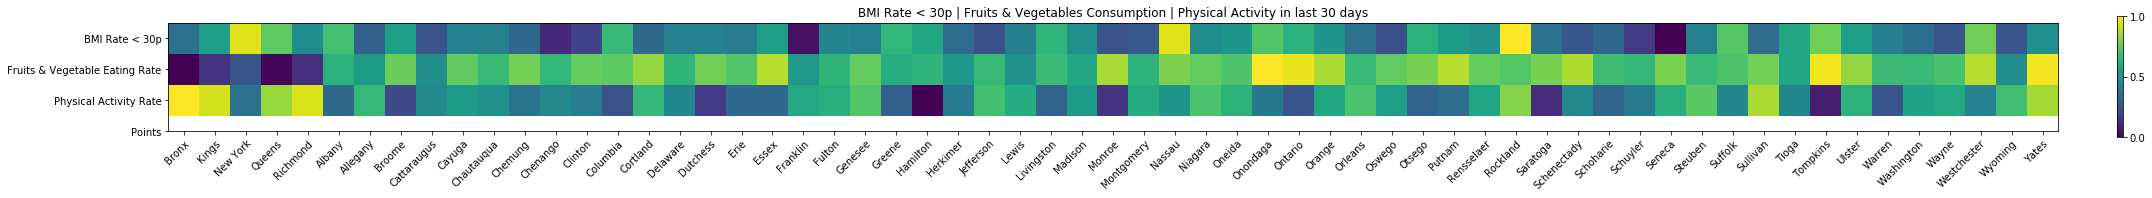

In [296]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

y_values = df_normalized.columns.to_list()[1:]

y_axis_ = y_values
x_axis_ = df_normalized['County']

values =[df_normalized['BMI Rate < 30p'].to_list(),
         df_normalized['Fruits & Vegetable Eating Rate'].to_list(),
        df_normalized['Physical Activity Rate'].to_list()]

fig, ax = plt.subplots(figsize=(30,30))

im = ax.imshow(values)

 # We want to show all ticks...
ax.set_xticks(np.arange(len(x_axis_)))
ax.set_yticks(np.arange(len(y_axis_)))
 # ... and label them with the respective list entries
ax.set_xticklabels(x_axis_)
ax.set_yticklabels(y_axis_)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
          rotation_mode="anchor")


cbar = fig.colorbar(im, ticks=[0, 0.5, 1], orientation='vertical', fraction=0.0031, pad=0.03)
cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])

ax.set_title("BMI Rate < 30p | Fruits & Vegetables Consumption | Physical Activity in last 30 days")
fig.tight_layout()
plt.show()

### Assigning points based on equal weights  for the 5 selected counties

In [295]:
df_normalized['Points']=df_normalized['BMI Rate < 30p']*0.3+df_normalized['Fruits & Vegetable Eating Rate']*0.3+df_normalized['Physical Activity Rate']*0.3
df_normalized.sort_values('Points', ascending=False).head().reset_index(drop=True)

County  BMI Rate < 30p  Fruits & Vegetable Eating Rate  \
0     Rockland        1.000000                        0.733577   
1        Yates        0.502222                        0.981752   
2       Nassau        0.951111                        0.802920   
3     Onondaga        0.728889                        1.000000   
4  Westchester        0.782222                        0.886861   

   Physical Activity Rate    Points  
0                0.818182  0.765528  
1                0.863636  0.704283  
2                0.517045  0.681323  
3                0.403409  0.639689  
4                0.443182  0.633680

### Income data for the 5 selected cities/towns

In [261]:
ny_income_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_New_York_locations_by_per_capita_income')
ny_income_data = pd.DataFrame(ny_income_data[2])
#ny_income_data = ny_income_data.sort_values('Per capitaincome', ascending=False).head(11)
ny_income_data.reset_index(drop=True, inplace=True)
#ny_income_data.drop(ny_income_data.index[8], inplace=True)

ny_income_data = ny_income_data[['County','Population', 'Per capitaincome', 'Medianhouseholdincome']]
ny_income_data = ny_income_data[(ny_income_data['County']=='Westchester') 
               | (ny_income_data['County']=='Nassau') 
               | (ny_income_data['County']=='Yates')
               | (ny_income_data['County']=='Onondaga')
               | (ny_income_data['County']=='Rockland')]
ny_income_data.reset_index(drop=True, inplace=True)

In [262]:
ny_income_data

County  Population Per capitaincome Medianhouseholdincome
0  Westchester      949113          $73,159               $79,619
1       Nassau     1339532          $41,387               $93,613
2     Rockland      311687          $34,304               $82,534
3     Onondaga      467026          $27,037               $50,676
4        Yates       25348          $23,255               $46,822

In [267]:
init_notebook_mode(connected=True)
x=ny_income_data['County'].to_list()
fig = go.Figure(go.Bar(x=x, y=ny_income_data['Per capitaincome'].to_list(), name='Per Capita Income', marker_color='indianred'))
fig.add_trace(go.Bar(x=x, y=ny_income_data['Medianhouseholdincome'].to_list(), name='Median Household Income', marker_color='lightsalmon'))

fig.update_layout(barmode='group', xaxis={'categoryorder':'array', 'categoryarray':x}, title=go.layout.Title(
        text="Per Capita Income & Median Household Income (Annual)",
        xref="paper",
        x=0))
                  
fig.show()

In [171]:
westchst_cities ={'City':['Yonkers', 'New Rochelle','Mount Vernon','White Plains',
                          'Peekskill', 'Rye', 'Bedford','Eastchester','Greenburgh','Harrison','Lewisboro','Pleasantville', 'Chappaqua'], 
                  'Latitude':[40.9312,40.9115,40.9126,41.0340,41.2901,40.9807,
                              41.2043, 40.9596, 41.0592,40.9700,41.2382, 41.1333,41.1595], 
                  'Longitude':[-73.8987,-73.7824,-73.8371,-73.7629,-73.9204,
                               -73.6837,-73.6437,-73.8096,-73.8286,-73.7176,-73.5226,-73.7924,-73.7649]}
westchst_cities_df = pd.DataFrame(westchst_cities)
westchst_cities_df

City  Latitude  Longitude
0         Yonkers   40.9312   -73.8987
1    New Rochelle   40.9115   -73.7824
2    Mount Vernon   40.9126   -73.8371
3    White Plains   41.0340   -73.7629
4       Peekskill   41.2901   -73.9204
5             Rye   40.9807   -73.6837
6         Bedford   41.2043   -73.6437
7     Eastchester   40.9596   -73.8096
8      Greenburgh   41.0592   -73.8286
9        Harrison   40.9700   -73.7176
10      Lewisboro   41.2382   -73.5226
11  Pleasantville   41.1333   -73.7924
12      Chappaqua   41.1595   -73.7649

In [206]:
map_counties = folium.Map(location=[41.0340, -73.7629], zoom_start=10)

# add markers to map
for lat, lng, label in zip(westchst_cities_df['Latitude'], westchst_cities_df['Longitude'], 
                           westchst_cities_df['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=False,
        fill_color='#3186cc',
        fill_opacity=0.1,
        parse_html=False).add_to(map_counties)  
    
map_counties

In [288]:
CLIENT_ID = CLIENT_ID # your Foursquare ID
CLIENT_SECRET = CLIENT_SECRET # your Foursquare Secret
VERSION = '20190807' # Foursquare API version

LIMIT=1000

### Foursquare API get request to get venues for each city/town

In [289]:
def getNearbyVenues(names, latitudes, longitudes, radius=20000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
# make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [290]:
westchester_venues = getNearbyVenues(names=westchst_cities_df['City'],
                                   latitudes=westchst_cities_df['Latitude'],
                                   longitudes=westchst_cities_df['Longitude']
                                  )

Yonkers
New Rochelle
Mount Vernon
White Plains
Peekskill
Rye
Bedford
Eastchester
Greenburgh
Harrison
Lewisboro
Pleasantville
Chappaqua


In [177]:
westchester_venues.head()

City  City Latitude  City Longitude                    Venue  \
0  Yonkers        40.9312        -73.8987                Wave Hill   
1  Yonkers        40.9312        -73.8987        Louie & Johnnie's   
2  Yonkers        40.9312        -73.8987           Untermyer Park   
3  Yonkers        40.9312        -73.8987  Kingsbridge Social Club   
4  Yonkers        40.9312        -73.8987       Van Cortlandt Park   

   Venue Latitude  Venue Longitude      Venue Category  
0       40.900062       -73.912446              Garden  
1       40.919346       -73.860462  Italian Restaurant  
2       40.966042       -73.886001                Park  
3       40.884545       -73.901964         Pizza Place  
4       40.887113       -73.893736                Park

In [178]:
westchester_venues.groupby(['City','City Latitude','City Longitude']).count()

Venue  Venue Latitude  \
City          City Latitude City Longitude                          
Bedford       41.2043       -73.6437          100             100   
Chappaqua     41.1595       -73.7649          100             100   
Eastchester   40.9596       -73.8096          100             100   
Greenburgh    41.0592       -73.8286          100             100   
Harrison      40.9700       -73.7176          100             100   
Lewisboro     41.2382       -73.5226          100             100   
Mount Vernon  40.9126       -73.8371          100             100   
New Rochelle  40.9115       -73.7824          100             100   
Peekskill     41.2901       -73.9204          100             100   
Pleasantville 41.1333       -73.7924          100             100   
Rye           40.9807       -73.6837          100             100   
White Plains  41.0340       -73.7629          100             100   
Yonkers       40.9312       -73.8987          100             100   

                                            Venue Longitude  Venue Category  
City          City Latitude City Longitude                                   
Bedford       41.2043       -73.6437                    100             100  
Chappaqua     41.1595       -73.7649                    100             100  
Eastchester   40.9596       -73.8096                    100             100  
Greenburgh    41.0592       -73.8286                    100             100  
Harrison      40.9700       -73.7176                    100             100  
Lewisboro     41.2382       -73.5226                    100             100  
Mount Vernon  40.9126       -73.8371                    100             100  
New Rochelle  40.9115       -73.7824                    100             100  
Peekskill     41.2901       -73.9204                    100             100  
Pleasantville 41.1333       -73.7924                    100             100  
Rye           40.9807       -73.6837                    100             100  
White Plains  41.0340       -73.7629                    100             100  
Yonkers       40.9312       -73.8987                    100             100

In [282]:
print('There are {} uniques categories.'.format(len(westchester_venues['Venue Category'].unique())))

There are 137 uniques categories.


### Creation of dummy variables for each venue

In [181]:
westchester_onehot = pd.get_dummies(westchester_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
westchester_onehot['City'] = westchester_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [westchester_onehot.columns[-1]] + list(westchester_onehot.columns[:-1])# + list(westchester_onehot.columns[121:])
westchester_onehot = westchester_onehot[fixed_columns]
westchester_onehot

City  African Restaurant  American Restaurant  Aquarium  \
0           Yonkers                   0                    0         0   
1           Yonkers                   0                    0         0   
2           Yonkers                   0                    0         0   
3           Yonkers                   0                    0         0   
4           Yonkers                   0                    0         0   
5           Yonkers                   0                    0         0   
6           Yonkers                   0                    0         0   
7           Yonkers                   0                    0         0   
8           Yonkers                   0                    0         0   
9           Yonkers                   0                    0         0   
10          Yonkers                   0                    0         0   
11          Yonkers                   0                    0         0   
12          Yonkers                   0                    0         0   
13          Yonkers                   0                    0         0   
14          Yonkers                   0                    0         0   
15          Yonkers                   0                    0         0   
16          Yonkers                   0                    0         0   
17          Yonkers                   0                    0         0   
18          Yonkers                   0                    0         0   
19          Yonkers                   0                    0         0   
20          Yonkers                   0                    0         0   
21          Yonkers                   0                    0         0   
22          Yonkers                   0                    0         0   
23          Yonkers                   0                    0         0   
24          Yonkers                   0                    0         0   
25          Yonkers                   0                    0         0   
26          Yonkers                   0                    0         0   
27          Yonkers                   0                    0         0   
28          Yonkers                   0                    0         0   
29          Yonkers                   0                    0         0   
30          Yonkers                   0                    0         0   
31          Yonkers                   0                    0         0   
32          Yonkers                   0                    0         0   
33          Yonkers                   0                    0         0   
34          Yonkers                   0                    0         0   
35          Yonkers                   0                    0         0   
36          Yonkers                   0                    0         0   
37          Yonkers                   0                    0         0   
38          Yonkers                   0                    0         0   
39          Yonkers                   0                    0         0   
40          Yonkers                   0                    0         0   
41          Yonkers                   0                    0         0   
42          Yonkers                   0                    0         0   
43          Yonkers                   0                    0         0   
44          Yonkers                   0                    1         0   
45          Yonkers                   0                    0         0   
46          Yonkers                   0                    0         0   
47          Yonkers                   0                    0         0   
48          Yonkers                   0                    0         0   
49          Yonkers                   0                    0         0   
50          Yonkers                   0                    0         0   
51          Yonkers                   0                    0         0   
52          Yonkers                   0                    0         0   
53          Yonkers

In [182]:
westchester_onehot.shape

(1300, 138)

In [281]:
westchester_grouped = westchester_onehot.groupby('City').mean().reset_index()
westchester_grouped

City  African Restaurant  American Restaurant  Aquarium  \
0         Bedford                0.01                 0.06      0.00   
1       Chappaqua                0.01                 0.03      0.00   
2     Eastchester                0.00                 0.02      0.00   
3      Greenburgh                0.00                 0.04      0.00   
4        Harrison                0.00                 0.02      0.00   
5       Lewisboro                0.00                 0.04      0.01   
6    Mount Vernon                0.00                 0.03      0.00   
7    New Rochelle                0.00                 0.02      0.00   
8       Peekskill                0.00                 0.03      0.00   
9   Pleasantville                0.01                 0.05      0.00   
10            Rye                0.00                 0.02      0.00   
11   White Plains                0.00                 0.01      0.00   
12        Yonkers                0.00                 0.03      0.00   

    Arepa Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0               0.00         0.00        0.01                 0.00   
1               0.00         0.00        0.00                 0.00   
2               0.00         0.00        0.00                 0.00   
3               0.00         0.00        0.00                 0.00   
4               0.00         0.00        0.00                 0.00   
5               0.00         0.00        0.01                 0.00   
6               0.01         0.00        0.01                 0.00   
7               0.01         0.00        0.01                 0.00   
8               0.00         0.01        0.00                 0.00   
9               0.00         0.00        0.00                 0.00   
10              0.00         0.00        0.00                 0.00   
11              0.00         0.00        0.00                 0.00   
12              0.01         0.00        0.01                 0.01   

    Asian Restaurant  Athletics & Sports  BBQ Joint  Bagel Shop  Bakery   Bar  \
0               0.01                0.00       0.00        0.01    0.02  0.00   
1               0.01                0.00       0.00        0.00    0.01  0.00   
2               0.00                0.00       0.01        0.00    0.03  0.01   
3               0.00                0.00       0.02        0.01    0.02  0.00   
4               0.00                0.00       0.00        0.00    0.02  0.01   
5               0.01                0.00       0.01        0.01    0.01  0.00   
6               0.00                0.01       0.01        0.01    0.06  0.01   
7               0.00                0.00       0.00        0.01    0.04  0.01   
8               0.01                0.00       0.02        0.02    0.01  0.02   
9               0.00                0.00       0.01        0.00    0.03  0.00   
10              0.00                0.00       0.01        0.00    0.01  0.01   
11              0.00                0.00       0.01        0.00    0.02  0.01   
12              0.00                0.01       0.01        0.00    0.06  0.01   

    Baseball Field  Beach  Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  \
0             0.01   0.00             0.01      0.00         0.00        0.01   
1             0.01   0.00             0.00      0.00         0.00        0.01   
2             0.00   0.00             0.00      0.01         0.01        0.02   
3             0.00   0.00             0.00      0.00         0.00        0.00   
4             0.00   0.03             0.00      0.00         0.00        0.02   
5             0.00   0.00             0.01      0.00         0.00        0.01   
6             0.00   0.00             0.00      0.01         0.01        0.01   
7             0.00   0.02             0.00      0.01         0.01        0.02   
8             0.00   0.01             0.00      0.00         0.00        0.00   
9             0.00   0.00             0.00      0.00         0.00        0.01 

### Finding the most popular venues in each city/town

In [184]:
num_top_venues = 5

for hood in westchester_grouped['City']:
    print("----"+hood+"----")
    temp = westchester_grouped[westchester_grouped['City'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bedford----
                 venue  freq
0   Italian Restaurant  0.08
1  American Restaurant  0.06
2          Pizza Place  0.05
3                 Park  0.04
4        Grocery Store  0.04


----Chappaqua----
                venue  freq
0  Italian Restaurant  0.06
1               Trail  0.06
2      Ice Cream Shop  0.05
3                Park  0.05
4         Pizza Place  0.04


----Eastchester----
                venue  freq
0         Pizza Place  0.10
1       Grocery Store  0.08
2                Park  0.05
3  Italian Restaurant  0.05
4                 Gym  0.03


----Greenburgh----
                venue  freq
0         Pizza Place  0.07
1         Golf Course  0.06
2       Grocery Store  0.05
3  Italian Restaurant  0.05
4               Trail  0.05


----Harrison----
                venue  freq
0         Pizza Place  0.12
1       Grocery Store  0.08
2  Italian Restaurant  0.08
3                Park  0.07
4         Golf Course  0.04


----Lewisboro----
                 venue  freq
0   Ita

In [185]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [279]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = westchester_grouped['City']

for ind in np.arange(westchester_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(westchester_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted

City 1st Most Common Venue 2nd Most Common Venue  \
0         Bedford    Italian Restaurant   American Restaurant   
1       Chappaqua    Italian Restaurant                 Trail   
2     Eastchester           Pizza Place         Grocery Store   
3      Greenburgh           Pizza Place           Golf Course   
4        Harrison           Pizza Place    Italian Restaurant   
5       Lewisboro    Italian Restaurant         Grocery Store   
6    Mount Vernon                  Park           Pizza Place   
7    New Rochelle           Pizza Place                  Park   
8       Peekskill        Scenic Lookout                 Trail   
9   Pleasantville    Italian Restaurant           Pizza Place   
10            Rye                  Park           Pizza Place   
11   White Plains           Pizza Place           Golf Course   
12        Yonkers           Pizza Place                  Park   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0            Pizza Place           Golf Course                  Park   
1         Ice Cream Shop                  Park            Restaurant   
2     Italian Restaurant                  Park           Golf Course   
3     Italian Restaurant                 Trail         Grocery Store   
4          Grocery Store                  Park                   Gym   
5            Pizza Place                  Park                  Café   
6                 Bakery         Grocery Store           Coffee Shop   
7     Italian Restaurant         Grocery Store                Bakery   
8         Ice Cream Shop                  Park           Pizza Place   
9                  Trail   American Restaurant        Ice Cream Shop   
10           Golf Course         Grocery Store    Italian Restaurant   
11    Italian Restaurant                  Park         Grocery Store   
12                Bakery         Grocery Store    Italian Restaurant   

   6th Most Common Venue 7th Most Common Venue          8th Most Common Venue  \
0          Grocery Store        Ice Cream Shop              French Restaurant   
1          Grocery Store           Pizza Place            American Restaurant   
2                 Bakery         Deli / Bodega                   Gourmet Shop   
3    American Restaurant                  Park        State / Provincial Park   
4            Golf Course         Deli / Bodega                 Ice Cream Shop   
5    American Restaurant             Wine Shop                           Farm   
6    American Restaurant                Garden             Italian Restaurant   
7                    Gym                Garden               Botanical Garden   
8            Coffee Shop                 Hotel                        Brewery   
9                   Park         Deli / Bodega                     Restaurant   
10        Ice Cream Shop                   Gym  Vegetarian / Vegan Restaurant   
11                 Trail          Gourmet Shop                 Cosmetics Shop   
12   American Restaurant                   Zoo                    Supermarket   

   9th Most Common Venue   10th Most Common Venue  
0     Mexican Restaurant                      Gym  
1                   Farm              Golf Course  
2                    Gym     Caribbean Restaurant  
3           Gourmet Shop               Restaurant  
4                  Beach             Gourmet Shop  
5           Burger Joint                  Brewery  
6                    Gym         Botanical Garden  
7            Golf Course               Beer Store  
8             Restaurant      American Restaurant  
9          Grocery Store  State / Provincial Park  
10                 Beach            Deli / Bodega  
11         Deli / Bodega           Sandwich Place  
12            Restaurant           Scenic Lookout

### Division of clusters into k numbers

In [280]:
kclusters = 3

westchester_grouped_clustering = westchester_grouped.drop('City', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(westchester_grouped_clustering)

kmeans.labels_[0:10]

array([2, 2, 0, 2, 0, 2, 1, 1, 2, 2])

### Clustered Data: the most popular venues in each city/town 

In [276]:
# add clustering labels
#city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

westchester_merged = westchst_cities_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
westchester_merged = westchester_merged.join(city_venues_sorted.set_index('City'), on='City')

westchester_merged.head(6) # check the last columns!

City  Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
0       Yonkers   40.9312   -73.8987               1           Pizza Place   
1  New Rochelle   40.9115   -73.7824               1           Pizza Place   
2  Mount Vernon   40.9126   -73.8371               1                  Park   
3  White Plains   41.0340   -73.7629               0           Pizza Place   
4     Peekskill   41.2901   -73.9204               2        Scenic Lookout   
5           Rye   40.9807   -73.6837               0                  Park   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                  Park                Bakery         Grocery Store   
1                  Park    Italian Restaurant         Grocery Store   
2           Pizza Place                Bakery         Grocery Store   
3           Golf Course    Italian Restaurant                  Park   
4                 Trail        Ice Cream Shop                  Park   
5           Pizza Place           Golf Course         Grocery Store   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0    Italian Restaurant   American Restaurant                   Zoo   
1                Bakery                   Gym                Garden   
2           Coffee Shop   American Restaurant                Garden   
3         Grocery Store                 Trail          Gourmet Shop   
4           Pizza Place           Coffee Shop                 Hotel   
5    Italian Restaurant        Ice Cream Shop                   Gym   

           8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                    Supermarket            Restaurant         Scenic Lookout  
1               Botanical Garden           Golf Course             Beer Store  
2             Italian Restaurant                   Gym       Botanical Garden  
3                 Cosmetics Shop         Deli / Bodega         Sandwich Place  
4                        Brewery            Restaurant    American Restaurant  
5  Vegetarian / Vegan Restaurant                 Beach          Deli / Bodega

### Representation of Clusters on the Map using Folium

In [194]:
map_clusters = folium.Map(location=[41.0340, -73.7629], zoom_start=10, tiles='Stamen Terrain')


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(westchester_merged['Latitude'], westchester_merged['Longitude'], 
                                  westchester_merged['City'], westchester_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster 0

In [269]:
westchester_merged.loc[westchester_merged['Cluster Labels'] == 0]

City  Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
3  White Plains   41.0340   -73.7629               0           Pizza Place   
5           Rye   40.9807   -73.6837               0                  Park   
7   Eastchester   40.9596   -73.8096               0           Pizza Place   
9      Harrison   40.9700   -73.7176               0           Pizza Place   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
3           Golf Course    Italian Restaurant                  Park   
5           Pizza Place           Golf Course         Grocery Store   
7         Grocery Store    Italian Restaurant                  Park   
9    Italian Restaurant         Grocery Store                  Park   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
3         Grocery Store                 Trail          Gourmet Shop   
5    Italian Restaurant        Ice Cream Shop                   Gym   
7           Golf Course                Bakery         Deli / Bodega   
9                   Gym           Golf Course         Deli / Bodega   

           8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
3                 Cosmetics Shop         Deli / Bodega         Sandwich Place  
5  Vegetarian / Vegan Restaurant                 Beach          Deli / Bodega  
7                   Gourmet Shop                   Gym   Caribbean Restaurant  
9                 Ice Cream Shop                 Beach           Gourmet Shop

### Cluster 1

In [197]:
westchester_merged.loc[westchester_merged['Cluster Labels'] == 1]

City  Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
0       Yonkers   40.9312   -73.8987               1           Pizza Place   
1  New Rochelle   40.9115   -73.7824               1           Pizza Place   
2  Mount Vernon   40.9126   -73.8371               1                  Park   

  2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                  Park                Bakery         Grocery Store   
1                  Park    Italian Restaurant         Grocery Store   
2           Pizza Place                Bakery         Grocery Store   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0    Italian Restaurant   American Restaurant                   Zoo   
1                Bakery                   Gym                Garden   
2           Coffee Shop   American Restaurant                Garden   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0           Supermarket            Restaurant         Scenic Lookout  
1      Botanical Garden           Golf Course             Beer Store  
2    Italian Restaurant                   Gym       Botanical Garden

### Cluster 2

In [274]:
westchester_merged.loc[westchester_merged['Cluster Labels'] == 2]

City  Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
4       Peekskill   41.2901   -73.9204               2        Scenic Lookout   
6         Bedford   41.2043   -73.6437               2    Italian Restaurant   
8      Greenburgh   41.0592   -73.8286               2           Pizza Place   
10      Lewisboro   41.2382   -73.5226               2    Italian Restaurant   
11  Pleasantville   41.1333   -73.7924               2    Italian Restaurant   
12      Chappaqua   41.1595   -73.7649               2    Italian Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
4                  Trail        Ice Cream Shop                  Park   
6    American Restaurant           Pizza Place           Golf Course   
8            Golf Course    Italian Restaurant                 Trail   
10         Grocery Store           Pizza Place                  Park   
11           Pizza Place                 Trail   American Restaurant   
12                 Trail        Ice Cream Shop                  Park   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
4            Pizza Place           Coffee Shop                 Hotel   
6                   Park         Grocery Store        Ice Cream Shop   
8          Grocery Store   American Restaurant                  Park   
10                  Café   American Restaurant             Wine Shop   
11        Ice Cream Shop                  Park         Deli / Bodega   
12            Restaurant         Grocery Store           Pizza Place   

      8th Most Common Venue 9th Most Common Venue   10th Most Common Venue  
4                   Brewery            Restaurant      American Restaurant  
6         French Restaurant    Mexican Restaurant                      Gym  
8   State / Provincial Park          Gourmet Shop               Restaurant  
10                     Farm          Burger Joint                  Brewery  
11               Restaurant         Grocery Store  State / Provincial Park  
12      American Restaurant                  Farm              Golf Course